# Description

The goal of this notebook is to perform exploratory data analytics where the data from two solar plants are analyzed to answer the following concerns:

-Predict the power generation for the next couple of days.
-Identify the need for cleaning or maintenance of the system.
-Identify faulty or sub-optimally performing equipment.


Methods employed are processing the data where:

-Obtain the daily power output yields per day and equipment.
-Identify the average, maximum, and minimum temperatures and maximum irradiation.


The following are present at the end of the analysis:
-The total plant and individual equipment yields at the end of each day.
-Prediction of possible yield for the next couple of days using the moving averages(MA) method.
-Yield distribution of each piece of equipment that determines equipment performance.
-Daily temperature and irradiation fluctuations compared with power yields to check the needs for maintenance of the solar panels.

# I. Plant 1 Data

In [1]:
#importing basic library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.dates import DateFormatter
import seaborn as sns

In [2]:
sns.set_theme()
sns.set_style('ticks')

In [3]:
#loading plant 1 dataset
df_plant_1_gen_data = pd.read_csv('Plant_1_Generation_Data.csv')
df_plant_1_gen_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [4]:
#checking the shape
df_plant_1_gen_data.shape

(68778, 7)

In [5]:
#checking for missing data
df_plant_1_gen_data.isnull().sum()

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

In [6]:
#checking for duplicated data
df_plant_1_gen_data.duplicated().sum()

0

In [7]:
df_plant_1_gen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [8]:
#counting unique values in 'SOURCE_KEY'
#pd.unique(df_plant_1_gen_data['SOURCE_KEY'])

In [9]:
df_plant_1_gen_data['SOURCE_KEY'].value_counts()

SOURCE_KEY
bvBOhCH3iADSZry    3155
1BY6WEcLGh8j5v7    3154
7JYdWkrLSPkdwr4    3133
VHMLBKoKgIrUVDU    3133
ZnxXDlPa8U1GXgE    3130
ih0vzX44oOqAx2f    3130
z9Y9gH1T5YWrNuG    3126
wCURE6d3bPkepu2    3126
uHbuxQJl8lW7ozc    3125
pkci93gMrogZuBj    3125
iCRJl6heRkivqQ3    3125
rGa61gmuvPhdLxV    3124
sjndEbLyjtCKgGv    3124
McdE0feGgRqW7Ca    3124
zVJPv84UY57bAof    3124
ZoEaEvLYb1n2sOq    3123
1IF53ai7Xc0U56Y    3119
adLQvlD726eNBSB    3119
zBIq5rxdHJRwDNY    3119
WRmjgnKYAwPKWDb    3118
3PZuoBAID5Wc2HD    3118
YxYtjZvoooNbGkE    3104
Name: count, dtype: int64

In [10]:
#checking data type on the dataframe
df_plant_1_gen_data.dtypes

DATE_TIME       object
PLANT_ID         int64
SOURCE_KEY      object
DC_POWER       float64
AC_POWER       float64
DAILY_YIELD    float64
TOTAL_YIELD    float64
dtype: object

In [11]:
#converting 'DATE_TIME' data to date-time format
df_plant_1_gen_data['DATE_TIME'] = pd.to_datetime(df_plant_1_gen_data['DATE_TIME'], dayfirst=True)
df_plant_1_gen_data.head()


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [12]:
#checking the data types again
df_plant_1_gen_data.dtypes

DATE_TIME      datetime64[ns]
PLANT_ID                int64
SOURCE_KEY             object
DC_POWER              float64
AC_POWER              float64
DAILY_YIELD           float64
TOTAL_YIELD           float64
dtype: object

In [13]:
#trial: creating new dataframe where the index is the date
df_plant_1_gen_data = df_plant_1_gen_data.set_index('DATE_TIME', drop=False)


In [14]:
#checking basic stat analysis
df_plant_1_gen_data.describe()

,DATE_TIME,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,2020-06-01 08:02:49.458256896,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06
min,2020-05-15 00:00:00,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,2020-05-24 00:45:00,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,2020-06-01 14:30:00,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06
75%,2020-06-09 20:00:00,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06
max,2020-06-17 23:45:00,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06
std,NaN,0.0,4036.457169,394.396439,3145.178309,4.162720e+05


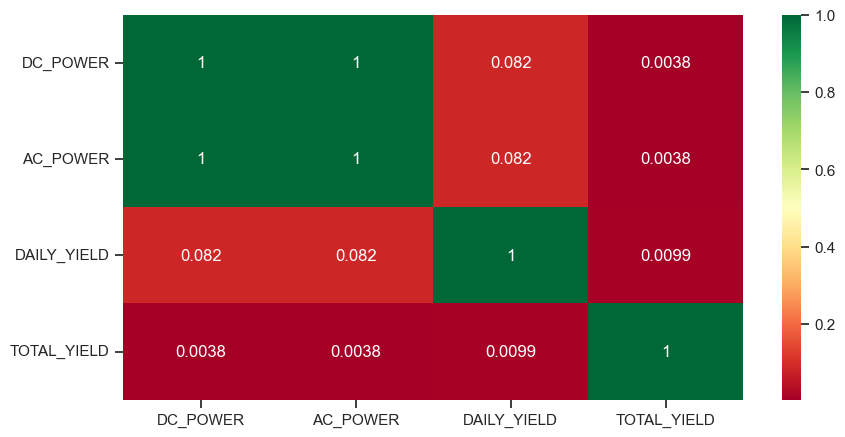

In [15]:
#producing correlation heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df_plant_1_gen_data.loc[:,'DC_POWER':].corr(), annot=True, cmap='RdYlGn')
plt.show()

In [16]:
#daily yield per inverter
#1. getting the maximum daily yield per day per inverter
df_p1_inv_d_yield = df_plant_1_gen_data.groupby([df_plant_1_gen_data['DATE_TIME'].dt.date, 'SOURCE_KEY'], as_index=True, sort=False)['DAILY_YIELD'].max()

#2. Above operations resulted to 'DATE_TIME' and 'SOURCE_KEY' to set as indices. Will convert indices back to columns
df_p1_inv_d_yield = df_p1_inv_d_yield.reset_index()

#3. Rename 'DATE_TIME' column
df_p1_inv_d_yield = df_p1_inv_d_yield.rename(columns={'DATE_TIME': 'DATE'})

#4. Convert 'DATE' datatype to datetime
df_p1_inv_d_yield['DATE'] = pd.to_datetime(df_p1_inv_d_yield['DATE'])

df_p1_inv_d_yield

,DATE,SOURCE_KEY,DAILY_YIELD
0,2020-05-15,1BY6WEcLGh8j5v7,5754.0
1,2020-05-15,1IF53ai7Xc0U56Y,6357.0
2,2020-05-15,3PZuoBAID5Wc2HD,6274.0
3,2020-05-15,7JYdWkrLSPkdwr4,6116.0
4,2020-05-15,McdE0feGgRqW7Ca,6471.0
...,...,...,...
743,2020-06-17,uHbuxQJl8lW7ozc,5967.0
744,2020-06-17,wCURE6d3bPkepu2,5883.0
745,2020-06-17,z9Y9gH1T5YWrNuG,5819.0
746,2020-06-17,zBIq5rxdHJRwDNY,5817.0


In [74]:
#output plant 1 data: inverter daily yield
df_p1_inv_d_yield.to_csv('Plant_1_Daily_inverter_yield.csv')

In [18]:
#daily yield: whole plant
df_p1_d_yield = df_p1_inv_d_yield.groupby('DATE').sum()
df_p1_d_yield = df_p1_d_yield.drop(['SOURCE_KEY'], axis=1).reset_index()
df_p1_d_yield.head(3)

,DATE,DAILY_YIELD
0,2020-05-15,137473.0
1,2020-05-16,142114.0
2,2020-05-17,165106.0


In [19]:
#calculating MA and adding to dataframe
df_p1_d_yield['CMA'] = df_p1_d_yield['DAILY_YIELD'].expanding().mean()
df_p1_d_yield['SMA_5'] = df_p1_d_yield['DAILY_YIELD'].rolling(5).mean()
df_p1_d_yield.head(3)

,DATE,DAILY_YIELD,CMA,SMA_5
0,2020-05-15,137473.0,137473.0,NaN
1,2020-05-16,142114.0,139793.5,NaN
2,2020-05-17,165106.0,148231.0,NaN


In [75]:
#output plant 1 data: inverter daily yield
df_p1_d_yield.to_csv('Plant_1_Daily_yield.csv')

## Climate Data for Plant 1

In [20]:
#loading plant 1 climate data
df_plant_1_climate_data = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')
df_plant_1_climate_data

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


In [21]:
#checking the shape
df_plant_1_climate_data.shape

(3182, 6)

In [22]:
#checking for missing data
df_plant_1_climate_data.isnull().sum()

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

In [23]:
df_plant_1_climate_data.duplicated().sum()

0

In [24]:
df_plant_1_climate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


In [25]:
#checking 'SOURCE_KEY' column for unique values
pd.unique(df_plant_1_climate_data['SOURCE_KEY'])


array(['HmiyD2TTLFNqkNe'], dtype=object)

In [26]:
#checking 'PLANT_ID' column for unique values
pd.unique(df_plant_1_climate_data['PLANT_ID'])


array([4135001], dtype=int64)

In [27]:
#convert 'DATE_TIME' column to datatime data type
df_plant_1_climate_data['DATE_TIME'] = pd.to_datetime(df_plant_1_climate_data['DATE_TIME'])
df_plant_1_climate_data

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


In [28]:
#checking the climate dateframe data type
df_plant_1_climate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3182 non-null   datetime64[ns]
 1   PLANT_ID             3182 non-null   int64         
 2   SOURCE_KEY           3182 non-null   object        
 3   AMBIENT_TEMPERATURE  3182 non-null   float64       
 4   MODULE_TEMPERATURE   3182 non-null   float64       
 5   IRRADIATION          3182 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 149.3+ KB


In [29]:
#dropping 'PLANT_ID' and 'SOURCE_KEY' columns
df_plant_1_climate_data = df_plant_1_climate_data.drop(['PLANT_ID', 'SOURCE_KEY'], axis=1)
df_plant_1_climate_data.head(3)

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,24.935753,22.592306,0.0


In [30]:
#basic stat analysis on climate data
df_plant_1_climate_data.describe()

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3182,3182.000000,3182.000000,3182.000000
mean,2020-06-01 05:52:22.080452608,25.531606,31.091015,0.228313
min,2020-05-15 00:00:00,20.398505,18.140415,0.000000
25%,2020-05-23 22:48:45,22.705182,21.090553,0.000000
50%,2020-06-01 09:52:30,24.613814,24.618060,0.024653
75%,2020-06-09 16:56:15,27.920532,41.307840,0.449588
max,2020-06-17 23:45:00,35.252486,65.545714,1.221652
std,NaN,3.354856,12.261222,0.300836


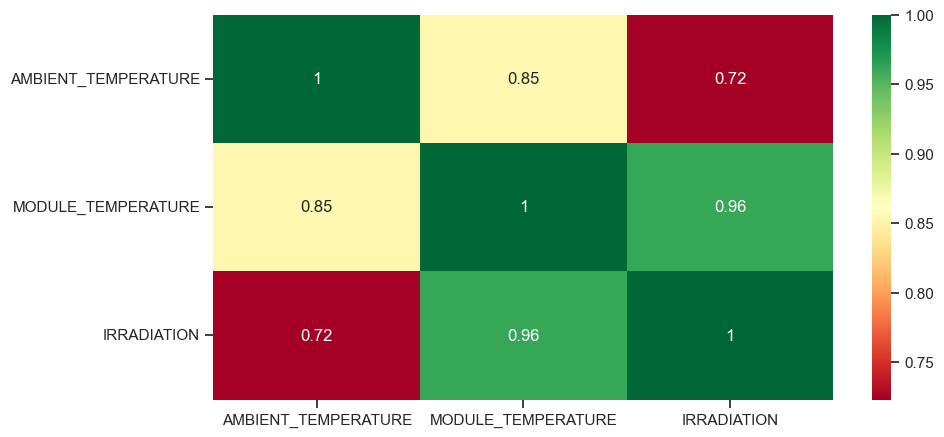

In [31]:
#plotting correlation heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df_plant_1_climate_data.loc[:,'AMBIENT_TEMPERATURE':].corr(), annot=True, cmap='RdYlGn')
plt.show()

In [32]:
#getting the mean, min and max ambient temperatures
#mean
p1_amb_mean = df_plant_1_climate_data.groupby(df_plant_1_climate_data['DATE_TIME'].dt.date)['AMBIENT_TEMPERATURE'].mean()
#min
p1_amb_min = df_plant_1_climate_data.groupby(df_plant_1_climate_data['DATE_TIME'].dt.date)['AMBIENT_TEMPERATURE'].min()
#max
p1_amb_max = df_plant_1_climate_data.groupby(df_plant_1_climate_data['DATE_TIME'].dt.date)['AMBIENT_TEMPERATURE'].max()



In [33]:
#getting the mean, min and max module temperatures
#mean
p1_mdl_mean = df_plant_1_climate_data.groupby(df_plant_1_climate_data['DATE_TIME'].dt.date)['MODULE_TEMPERATURE'].mean()
#min
p1_mdl_min = df_plant_1_climate_data.groupby(df_plant_1_climate_data['DATE_TIME'].dt.date)['MODULE_TEMPERATURE'].min()
#max
p1_mdl_max = df_plant_1_climate_data.groupby(df_plant_1_climate_data['DATE_TIME'].dt.date)['MODULE_TEMPERATURE'].max()



In [34]:
#getting the mean, max irradiance
#mean
p1_irr_mean = df_plant_1_climate_data.groupby(df_plant_1_climate_data['DATE_TIME'].dt.date)['IRRADIATION'].mean()
#min
p1_irr_min = df_plant_1_climate_data.groupby(df_plant_1_climate_data['DATE_TIME'].dt.date)['IRRADIATION'].min()
#min
p1_irr_max = df_plant_1_climate_data.groupby(df_plant_1_climate_data['DATE_TIME'].dt.date)['IRRADIATION'].max()


In [35]:
df_new_p1_climate = pd.concat([p1_irr_max, p1_amb_mean, p1_amb_min, p1_amb_max, p1_mdl_mean, p1_mdl_min, p1_mdl_max], axis=1, ignore_index=True)
df_new_p1_climate = df_new_p1_climate.rename(columns={0:'MAX IRRADIATION', 1:'MEAN AMBIENT TEMP', 2:'MIN AMBIENT TEMP', 3:'MAX AMBIENT TEMP', 4:'MEAN MODULE TEMP', 5:'MIN MODULE TEMP', 6:'MAX MODULE TEMP'})
df_new_p1_climate = df_new_p1_climate.reset_index()
df_new_p1_climate['DATE_TIME'] = pd.to_datetime(df_new_p1_climate['DATE_TIME'])
df_new_p1_climate.head(3)

,DATE_TIME,MAX IRRADIATION,MEAN AMBIENT TEMP,MIN AMBIENT TEMP,MAX AMBIENT TEMP,MEAN MODULE TEMP,MIN MODULE TEMP,MAX MODULE TEMP
0,2020-05-15,0.893661,27.430823,22.037482,34.430943,32.582964,20.290726,55.030613
1,2020-05-16,0.812241,26.780538,21.496287,32.524149,31.858851,19.592692,54.232746
2,2020-05-17,0.997904,26.686727,21.209418,35.252486,32.740435,20.377121,63.145582


In [76]:
#output plant 1 data: processed climate data
df_new_p1_climate.to_csv('Plant_1_processed_climate_data.csv')

In [36]:
#correlation between climate and generation data variables
df_p1_d_yield['DAILY_YIELD'].corr(df_new_p1_climate['MAX IRRADIATION'])

0.3608454657100561

# II. Plant 2 Data

In [37]:
#loading plant 2 dataset
df_plant_2_gen_data = pd.read_csv('Plant_2_Generation_Data.csv')
df_plant_2_gen_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07


In [38]:
#checking the shape
df_plant_2_gen_data.shape

(67698, 7)

In [39]:
#checking for missing data
df_plant_2_gen_data.isnull().sum()

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

In [40]:
#checking for duplicated data
df_plant_2_gen_data.duplicated().sum()

0

In [41]:
df_plant_2_gen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 non-null  float64
 5   DAILY_YIELD  67698 non-null  float64
 6   TOTAL_YIELD  67698 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.6+ MB


In [42]:
df_plant_2_gen_data['SOURCE_KEY'].value_counts()

SOURCE_KEY
xoJJ8DcxJEcupym    3259
WcxssY2VbP4hApt    3259
9kRcWv60rDACzjR    3259
vOuJvMaM2sgwLmb    3259
rrq4fwE8jgrTyWY    3259
LYwnQax7tkwH5Cb    3259
LlT2YUhhzqhg5Sw    3259
q49J1IKaHRwDQnt    3259
oZZkBaNadn6DNKz    3259
PeE6FRyGXUgsRhN    3259
81aHJ1q11NBPMrL    3259
V94E5Ben1TlhnDV    3259
oZ35aAeoifZaQzV    3195
4UPUqMRk7TRMgml    3195
Qf4GUc1pJu5T6c6    3195
Mx2yZCDsyf6DPfv    3195
Et9kgGMDl729KT4    3195
Quc1TzYxW2pYoWX    3195
mqwcsP2rE7J0TFp    2355
NgDl19wMapZy17u    2355
IQ2d7wF4YD8zU1Q    2355
xMbIugepa2P7lBB    2355
Name: count, dtype: int64

In [43]:
#converting 'DATE_TIME' data to date-time format
df_plant_2_gen_data['DATE_TIME'] = pd.to_datetime(df_plant_2_gen_data['DATE_TIME'], dayfirst=True)
df_plant_2_gen_data.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12508\2803099261.py:2: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df_plant_2_gen_data['DATE_TIME'] = pd.to_datetime(df_plant_2_gen_data['DATE_TIME'], dayfirst=True)


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07


In [44]:
#checking the data types again
df_plant_2_gen_data.dtypes

DATE_TIME      datetime64[ns]
PLANT_ID                int64
SOURCE_KEY             object
DC_POWER              float64
AC_POWER              float64
DAILY_YIELD           float64
TOTAL_YIELD           float64
dtype: object

In [45]:
#checking basic stat analysis
df_plant_2_gen_data.describe()

,DATE_TIME,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,67698,67698.0,67698.000000,67698.000000,67698.000000,6.769800e+04
mean,2020-06-01 10:44:33.650625024,4136001.0,246.701961,241.277825,3294.890295,6.589448e+08
min,2020-05-15 00:00:00,4136001.0,0.000000,0.000000,0.000000,0.000000e+00
25%,2020-05-23 21:00:00,4136001.0,0.000000,0.000000,272.750000,1.996494e+07
50%,2020-06-01 23:00:00,4136001.0,0.000000,0.000000,2911.000000,2.826276e+08
75%,2020-06-09 23:30:00,4136001.0,446.591667,438.215000,5534.000000,1.348495e+09
max,2020-06-17 23:45:00,4136001.0,1420.933333,1385.420000,9873.000000,2.247916e+09
std,NaN,0.0,370.569597,362.112118,2919.448386,7.296678e+08


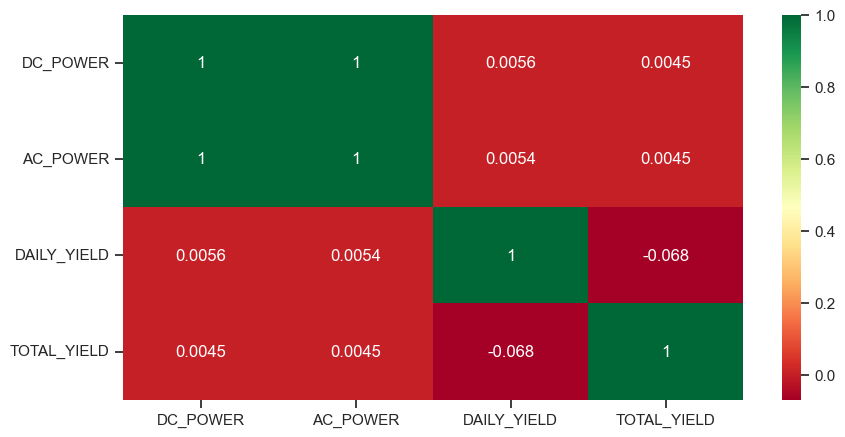

In [46]:
#producing correlation heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df_plant_2_gen_data.loc[:,'DC_POWER':].corr(), annot=True, cmap='RdYlGn')
plt.show()

In [47]:
#daily yield per inverter
df_p2_inv_d_yield = df_plant_2_gen_data.groupby([df_plant_2_gen_data['DATE_TIME'].dt.date, 'SOURCE_KEY'], as_index=True, sort=False)['DAILY_YIELD'].max()
df_p2_inv_d_yield = df_p2_inv_d_yield.reset_index()
df_p2_inv_d_yield = df_p2_inv_d_yield.rename(columns={'DATE_TIME': 'DATE'})
df_p2_inv_d_yield['DATE'] = pd.to_datetime(df_p2_inv_d_yield['DATE'])
df_p2_inv_d_yield

,DATE,SOURCE_KEY,DAILY_YIELD
0,2020-05-15,4UPUqMRk7TRMgml,9425.0
1,2020-05-15,81aHJ1q11NBPMrL,3214.0
2,2020-05-15,9kRcWv60rDACzjR,9246.0
3,2020-05-15,Et9kgGMDl729KT4,4154.0
4,2020-05-15,IQ2d7wF4YD8zU1Q,9663.0
...,...,...,...
711,2020-06-17,q49J1IKaHRwDQnt,4157.0
712,2020-06-17,rrq4fwE8jgrTyWY,3931.0
713,2020-06-17,vOuJvMaM2sgwLmb,4322.0
714,2020-06-17,xMbIugepa2P7lBB,5502.0


In [48]:
#daily yield: whole plant
df_p2_d_yield = df_p2_inv_d_yield.groupby('DATE').sum()
df_p2_d_yield = df_p2_d_yield.drop(['SOURCE_KEY'], axis=1).reset_index()
df_p2_d_yield.head(3)

,DATE,DAILY_YIELD
0,2020-05-15,169356.000000
1,2020-05-16,147356.933333
2,2020-05-17,139414.000000


In [49]:
#calculating MA and adding to dataframe
df_p2_d_yield['CMA'] = df_p2_d_yield['DAILY_YIELD'].expanding().mean()
df_p2_d_yield['SMA_5'] = df_p2_d_yield['DAILY_YIELD'].rolling(5).mean()
df_p2_d_yield.head(3)

,DATE,DAILY_YIELD,CMA,SMA_5
0,2020-05-15,169356.000000,169356.000000,NaN
1,2020-05-16,147356.933333,158356.466667,NaN
2,2020-05-17,139414.000000,152042.311111,NaN


## Climate Data for plant 2

In [50]:
#loading plant 1 climate data
df_plant_2_climate_data = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')
df_plant_2_climate_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


In [51]:
#checking the shape
df_plant_2_climate_data.shape

(3259, 6)

In [52]:
#checking for missing data
df_plant_2_climate_data.isnull().sum()

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

In [53]:
df_plant_2_climate_data.duplicated().sum()

0

In [54]:
df_plant_2_climate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   object 
 1   PLANT_ID             3259 non-null   int64  
 2   SOURCE_KEY           3259 non-null   object 
 3   AMBIENT_TEMPERATURE  3259 non-null   float64
 4   MODULE_TEMPERATURE   3259 non-null   float64
 5   IRRADIATION          3259 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 152.9+ KB


In [55]:
#checking 'SOURCE_KEY' column for unique values
pd.unique(df_plant_2_climate_data['SOURCE_KEY'])

array(['iq8k7ZNt4Mwm3w0'], dtype=object)

In [56]:
#checking 'PLANT_ID' column for unique values
pd.unique(df_plant_2_climate_data['PLANT_ID'])

array([4136001], dtype=int64)

In [57]:
#convert 'DATE_TIME' column to datatime data type
df_plant_2_climate_data['DATE_TIME'] = pd.to_datetime(df_plant_2_climate_data['DATE_TIME'])
df_plant_2_climate_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


In [58]:
#checking the climate dateframe data type
df_plant_2_climate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3259 non-null   datetime64[ns]
 1   PLANT_ID             3259 non-null   int64         
 2   SOURCE_KEY           3259 non-null   object        
 3   AMBIENT_TEMPERATURE  3259 non-null   float64       
 4   MODULE_TEMPERATURE   3259 non-null   float64       
 5   IRRADIATION          3259 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 152.9+ KB


In [59]:
#dropping 'PLANT_ID' and 'SOURCE_KEY' columns
df_plant_2_climate_data = df_plant_2_climate_data.drop(['PLANT_ID', 'SOURCE_KEY'], axis=1)
df_plant_2_climate_data.head(3)

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,26.682055,24.427290,0.0


In [60]:
#basic stat analysis on climate data
df_plant_2_climate_data.describe()

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3259,3259.000000,3259.000000,3259.000000
mean,2020-06-01 00:04:35.053697536,28.069400,32.772408,0.232737
min,2020-05-15 00:00:00,20.942385,20.265123,0.000000
25%,2020-05-23 12:07:30,24.602135,23.716881,0.000000
50%,2020-06-01 00:00:00,26.981263,27.534606,0.019040
75%,2020-06-09 12:07:30,31.056757,40.480653,0.438717
max,2020-06-17 23:45:00,39.181638,66.635953,1.098766
std,NaN,4.061556,11.344034,0.312693


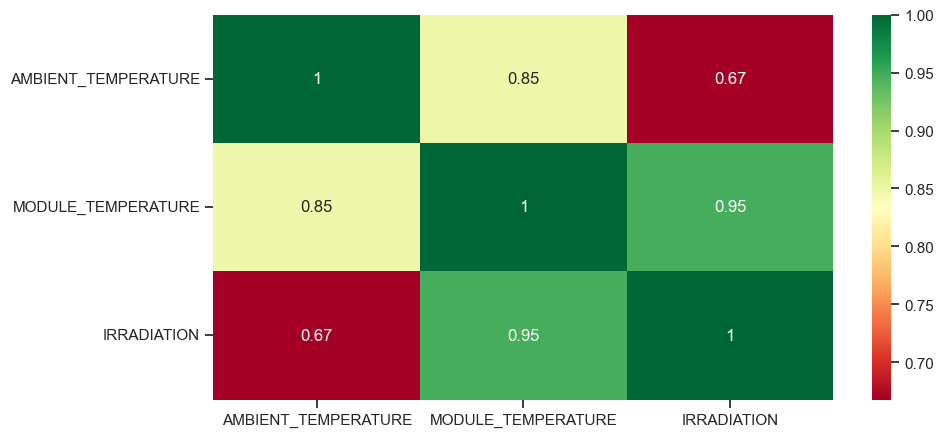

In [61]:
#plotting correlation heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df_plant_2_climate_data.loc[:,'AMBIENT_TEMPERATURE':].corr(), annot=True, cmap='RdYlGn')
plt.show()

In [62]:
#getting the mean, min and max ambient temperatures
p2_amb_mean = df_plant_2_climate_data.groupby(df_plant_2_climate_data['DATE_TIME'].dt.date)['AMBIENT_TEMPERATURE'].mean() #mean
p2_amb_min = df_plant_2_climate_data.groupby(df_plant_2_climate_data['DATE_TIME'].dt.date)['AMBIENT_TEMPERATURE'].min() #min
p2_amb_max = df_plant_2_climate_data.groupby(df_plant_2_climate_data['DATE_TIME'].dt.date)['AMBIENT_TEMPERATURE'].max() #max

In [63]:
#getting the mean, min and max module temperatures
p2_mdl_mean = df_plant_2_climate_data.groupby(df_plant_2_climate_data['DATE_TIME'].dt.date)['MODULE_TEMPERATURE'].mean() #mean
p2_mdl_min = df_plant_2_climate_data.groupby(df_plant_2_climate_data['DATE_TIME'].dt.date)['MODULE_TEMPERATURE'].min() #min
p2_mdl_max = df_plant_2_climate_data.groupby(df_plant_2_climate_data['DATE_TIME'].dt.date)['MODULE_TEMPERATURE'].max() #max

In [64]:
#getting the mean, max irradiance
p2_irr_max = df_plant_2_climate_data.groupby(df_plant_2_climate_data['DATE_TIME'].dt.date)['IRRADIATION'].max() #min

In [65]:
df_new_p2_climate = pd.concat([p2_irr_max, p2_amb_mean, p2_amb_min, p2_amb_max, p2_mdl_mean, p2_mdl_min, p2_mdl_max], axis=1, ignore_index=True)
df_new_p2_climate = df_new_p2_climate.rename(columns={0:'MAX IRRADIATION', 1:'MEAN AMBIENT TEMP', 2:'MIN AMBIENT TEMP', 3:'MAX AMBIENT TEMP', 4:'MEAN MODULE TEMP', 5:'MIN MODULE TEMP', 6:'MAX MODULE TEMP'})
df_new_p2_climate = df_new_p2_climate.reset_index()
df_new_p2_climate['DATE_TIME'] = pd.to_datetime(df_new_p2_climate['DATE_TIME'])
df_new_p2_climate.head(3)

,DATE_TIME,MAX IRRADIATION,MEAN AMBIENT TEMP,MIN AMBIENT TEMP,MAX AMBIENT TEMP,MEAN MODULE TEMP,MIN MODULE TEMP,MAX MODULE TEMP
0,2020-05-15,0.987932,30.565992,24.741274,37.352829,35.559493,23.786662,60.389377
1,2020-05-16,0.989619,29.478612,23.555945,36.358956,35.143314,21.139804,66.016279
2,2020-05-17,0.799829,29.780109,23.429923,36.831242,34.626731,21.718280,59.100530


# III. Data Analysis

## Plant 1

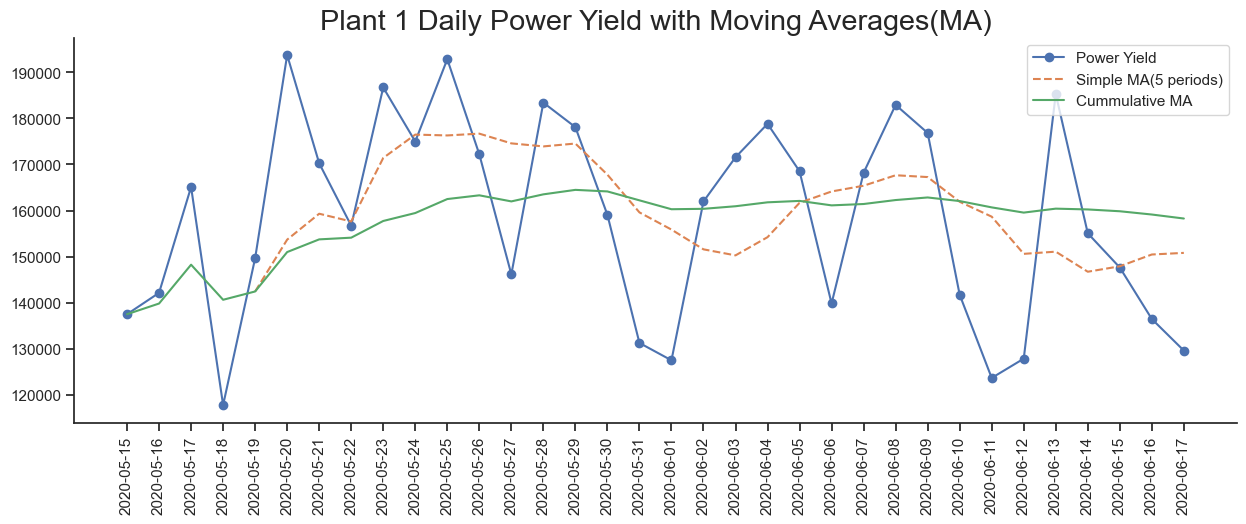

In [66]:
#plotting daily power yield
plt.figure(figsize=(15, 5))
plt.plot(df_p1_d_yield['DATE'], df_p1_d_yield['DAILY_YIELD'], marker='o', label='Power Yield')
plt.plot(df_p1_d_yield['DATE'], df_p1_d_yield['SMA_5'], linestyle="--", label='Simple MA(5 periods)')
plt.plot(df_p1_d_yield['DATE'], df_p1_d_yield['CMA'], label='Cummulative MA')
plt.xticks(df_p1_d_yield['DATE'], rotation=90)
plt.legend(loc='upper right')
plt.title('Plant 1 Daily Power Yield with Moving Averages(MA)', fontsize='xx-large')
sns.despine()
plt.show()

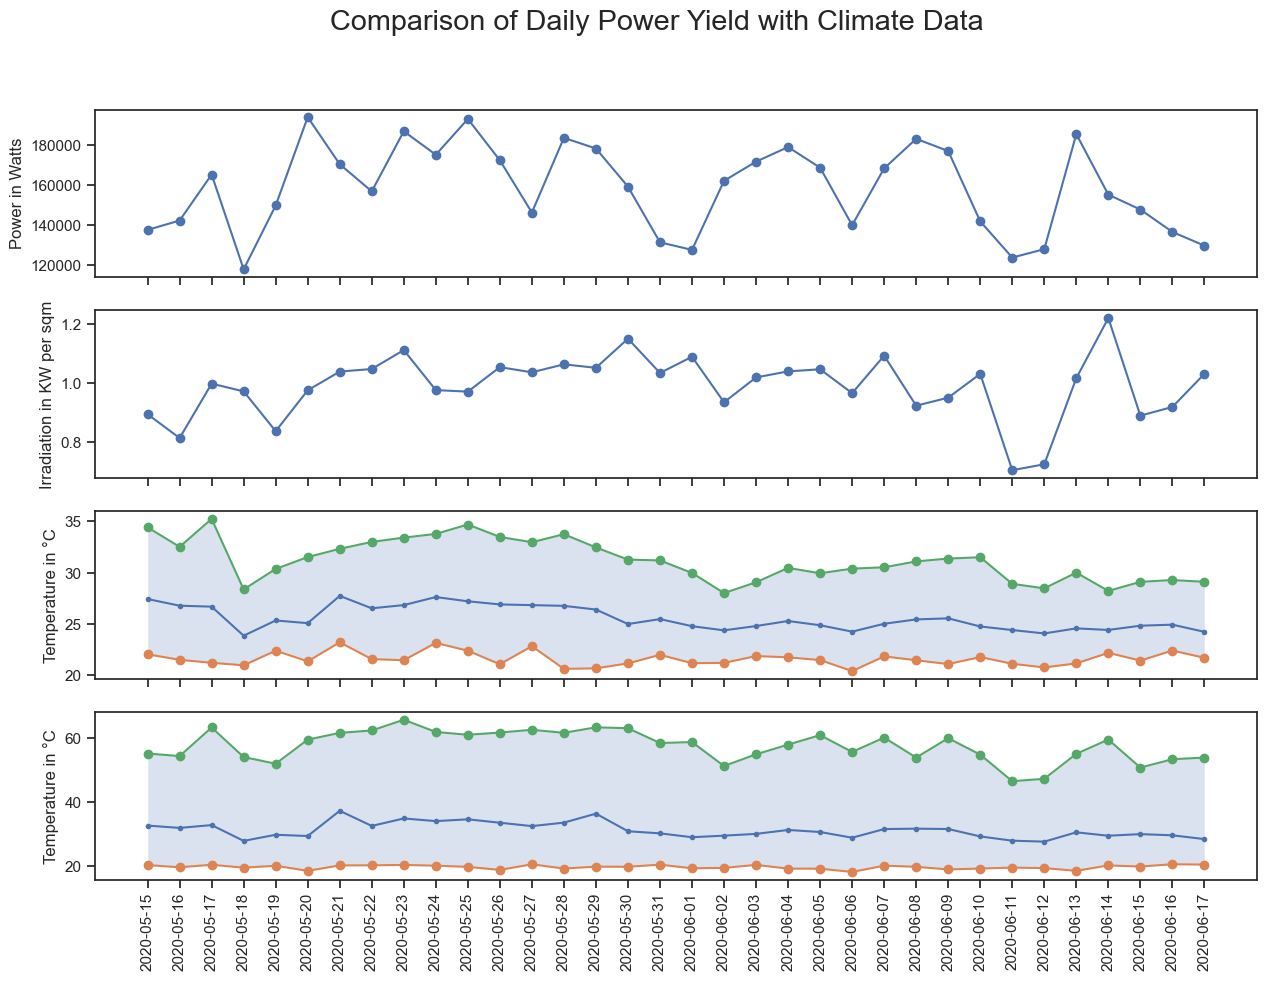

In [67]:
#multi chart
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(15,10))
fig.suptitle('Comparison of Daily Power Yield with Climate Data', fontsize='xx-large')

ax1.plot(df_p1_d_yield['DATE'], df_p1_d_yield['DAILY_YIELD'], marker='o') #daily power output of plant 1
ax1.set_ylabel('Power in Watts')

ax2.plot(df_new_p1_climate['DATE_TIME'], df_new_p1_climate['MAX IRRADIATION'], marker='o') #max irradiation
ax2.set_ylabel('Irradiation in KW per sqm')

#ambient temperature
ax3.plot(df_new_p1_climate['DATE_TIME'], df_new_p1_climate['MEAN AMBIENT TEMP'], marker='.')
ax3.plot(df_new_p1_climate['DATE_TIME'], df_new_p1_climate['MIN AMBIENT TEMP'], marker='o', label='Min Ambient Temp')
ax3.plot(df_new_p1_climate['DATE_TIME'], df_new_p1_climate['MAX AMBIENT TEMP'], marker='o', label='Max Ambient Temp')
ax3.fill_between(df_new_p1_climate['DATE_TIME'], df_new_p1_climate['MAX AMBIENT TEMP'], df_new_p1_climate['MIN AMBIENT TEMP'], alpha=0.2)
ax3.set_ylabel('Temperature in \u00B0C')

#module temperature
ax4.plot(df_new_p1_climate['DATE_TIME'], df_new_p1_climate['MEAN MODULE TEMP'], marker='.')
ax4.plot(df_new_p1_climate['DATE_TIME'], df_new_p1_climate['MIN MODULE TEMP'], marker='o', label='Min Module Temp')
ax4.plot(df_new_p1_climate['DATE_TIME'], df_new_p1_climate['MAX MODULE TEMP'], marker='o', label='Max module Temp')
ax4.fill_between(df_new_p1_climate['DATE_TIME'], df_new_p1_climate['MAX MODULE TEMP'], df_new_p1_climate['MIN MODULE TEMP'], alpha=0.2)
ax4.set_ylabel('Temperature in \u00B0C')

plt.xticks(df_new_p1_climate['DATE_TIME'], rotation=90)
plt.show()

<Figure size 1000x500 with 0 Axes>

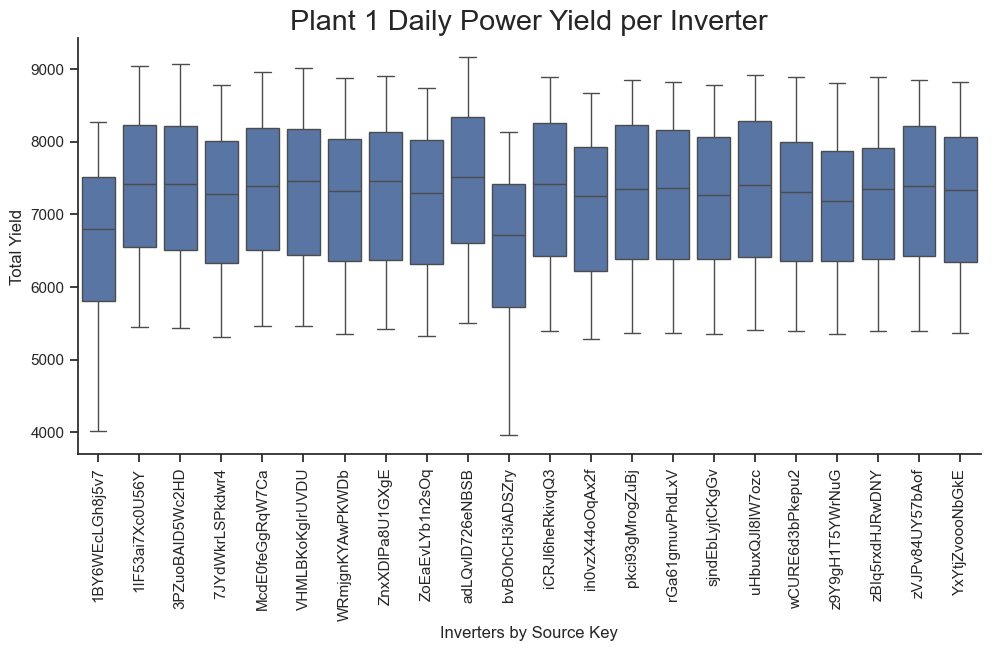

In [68]:
#plotting yield distribution per inverter
plt.figure(figsize=(10, 5))
sns.catplot(df_p1_inv_d_yield, x='SOURCE_KEY', y='DAILY_YIELD', kind='box', aspect=2)
plt.xticks(rotation=90)
plt.ylabel("Total Yield")
plt.xlabel('Inverters by Source Key')
plt.title('Plant 1 Daily Power Yield per Inverter', fontsize='xx-large')
plt.show()

<Figure size 1000x500 with 0 Axes>

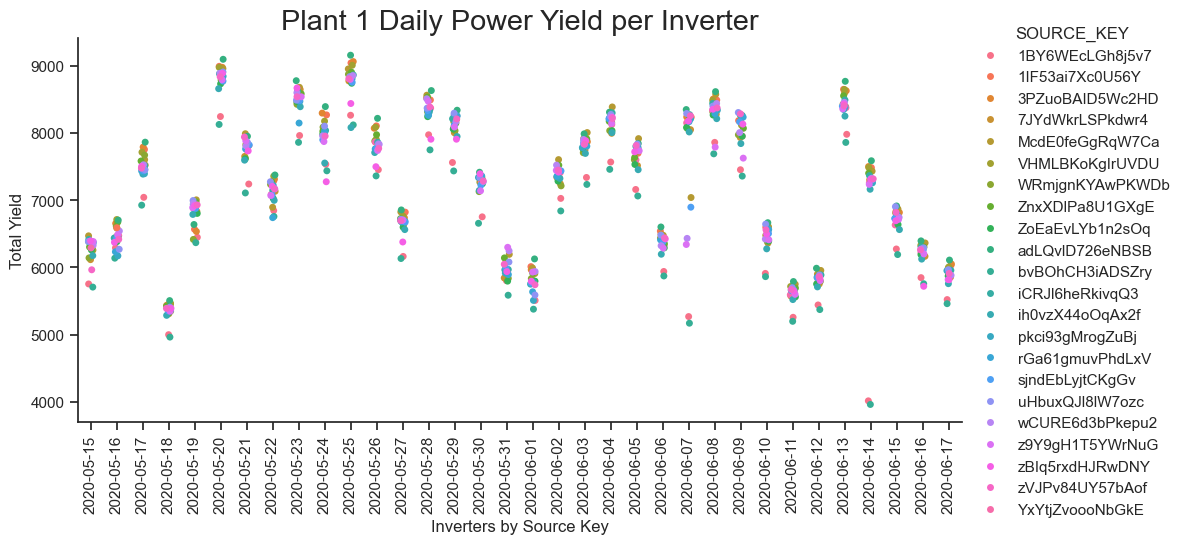

In [69]:
plt.figure(figsize=(10, 5))
sns.catplot(df_p1_inv_d_yield, x='DATE', y='DAILY_YIELD', hue='SOURCE_KEY', kind='strip', aspect=2)
plt.xticks(rotation=90)
plt.ylabel("Total Yield")
plt.xlabel('Inverters by Source Key')
plt.title('Plant 1 Daily Power Yield per Inverter', fontsize='xx-large')
plt.show()

## Plant 2

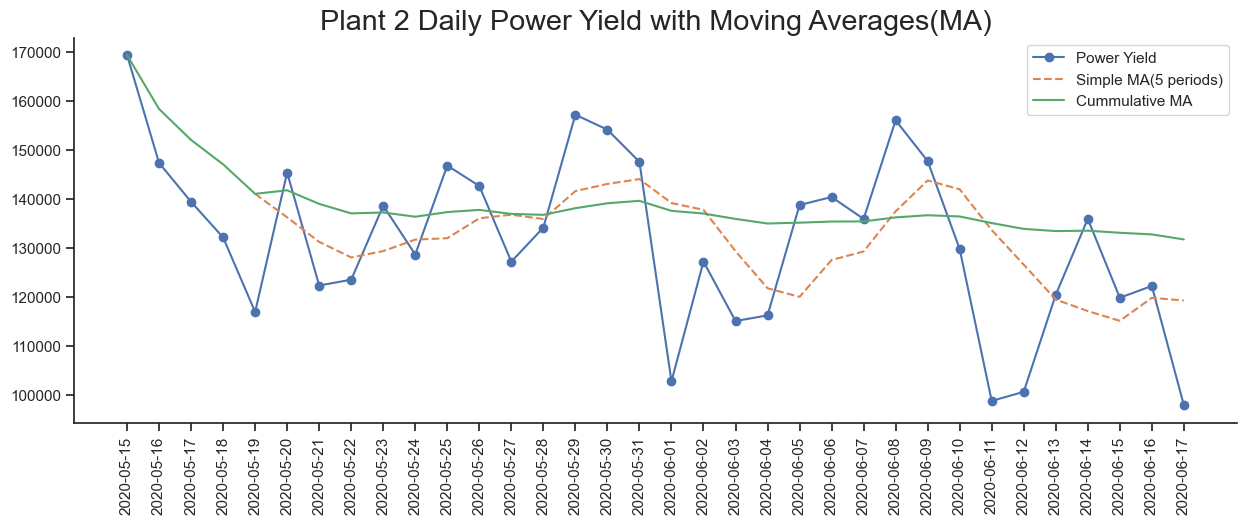

In [70]:
plt.figure(figsize=(15, 5))
plt.plot(df_p2_d_yield['DATE'], df_p2_d_yield['DAILY_YIELD'], marker='o', label='Power Yield')
plt.plot(df_p2_d_yield['DATE'], df_p2_d_yield['SMA_5'], linestyle="--", label='Simple MA(5 periods)')
plt.plot(df_p2_d_yield['DATE'], df_p2_d_yield['CMA'], label='Cummulative MA')
plt.xticks(df_p2_d_yield['DATE'], rotation=90)
plt.legend()
plt.title('Plant 2 Daily Power Yield with Moving Averages(MA)', fontsize='xx-large')
sns.despine()
plt.show()

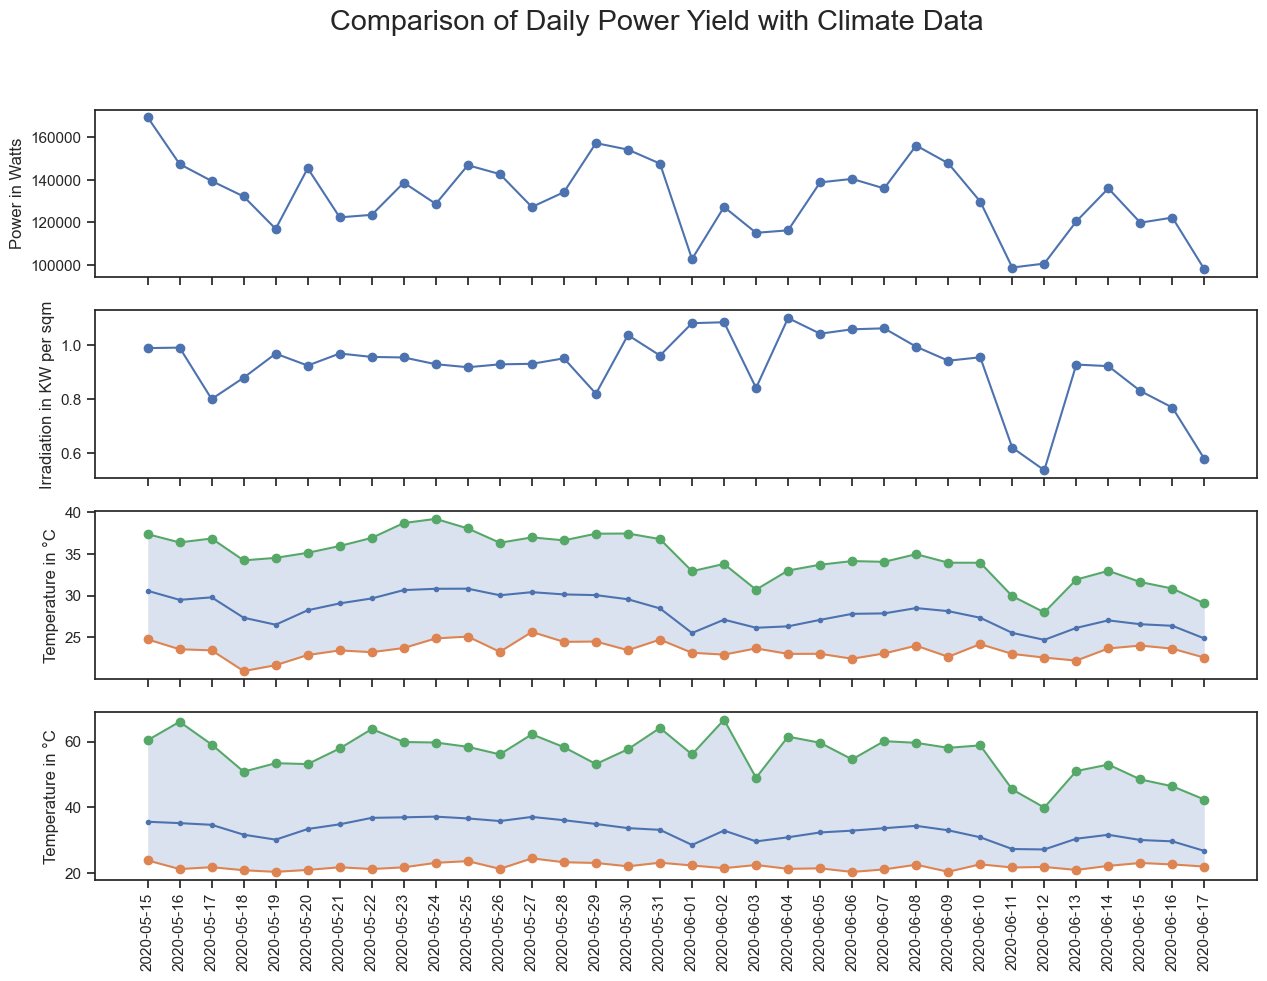

In [71]:
#multi chart
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(15,10))
fig.suptitle('Comparison of Daily Power Yield with Climate Data', fontsize='xx-large')

ax1.plot(df_p2_d_yield['DATE'], df_p2_d_yield['DAILY_YIELD'], marker='o') #daily power output of plant 1
ax1.set_ylabel('Power in Watts')

ax2.plot(df_new_p2_climate['DATE_TIME'], df_new_p2_climate['MAX IRRADIATION'], marker='o') #max irradiation
ax2.set_ylabel('Irradiation in KW per sqm')

#ambient temperature
ax3.plot(df_new_p2_climate['DATE_TIME'], df_new_p2_climate['MEAN AMBIENT TEMP'], marker='.')
ax3.plot(df_new_p2_climate['DATE_TIME'], df_new_p2_climate['MIN AMBIENT TEMP'], marker='o', label='Min Ambient Temp')
ax3.plot(df_new_p2_climate['DATE_TIME'], df_new_p2_climate['MAX AMBIENT TEMP'], marker='o', label='Max Ambient Temp')
ax3.fill_between(df_new_p2_climate['DATE_TIME'], df_new_p2_climate['MAX AMBIENT TEMP'], df_new_p2_climate['MIN AMBIENT TEMP'], alpha=0.2)
ax3.set_ylabel('Temperature in \u00B0C')

#module temperature
ax4.plot(df_new_p2_climate['DATE_TIME'], df_new_p2_climate['MEAN MODULE TEMP'], marker='.')
ax4.plot(df_new_p2_climate['DATE_TIME'], df_new_p2_climate['MIN MODULE TEMP'], marker='o', label='Min Module Temp')
ax4.plot(df_new_p2_climate['DATE_TIME'], df_new_p2_climate['MAX MODULE TEMP'], marker='o', label='Max module Temp')
ax4.fill_between(df_new_p2_climate['DATE_TIME'], df_new_p2_climate['MAX MODULE TEMP'], df_new_p2_climate['MIN MODULE TEMP'], alpha=0.2)
ax4.set_ylabel('Temperature in \u00B0C')

plt.xticks(df_new_p2_climate['DATE_TIME'], rotation=90)
plt.show()

<Figure size 1000x500 with 0 Axes>

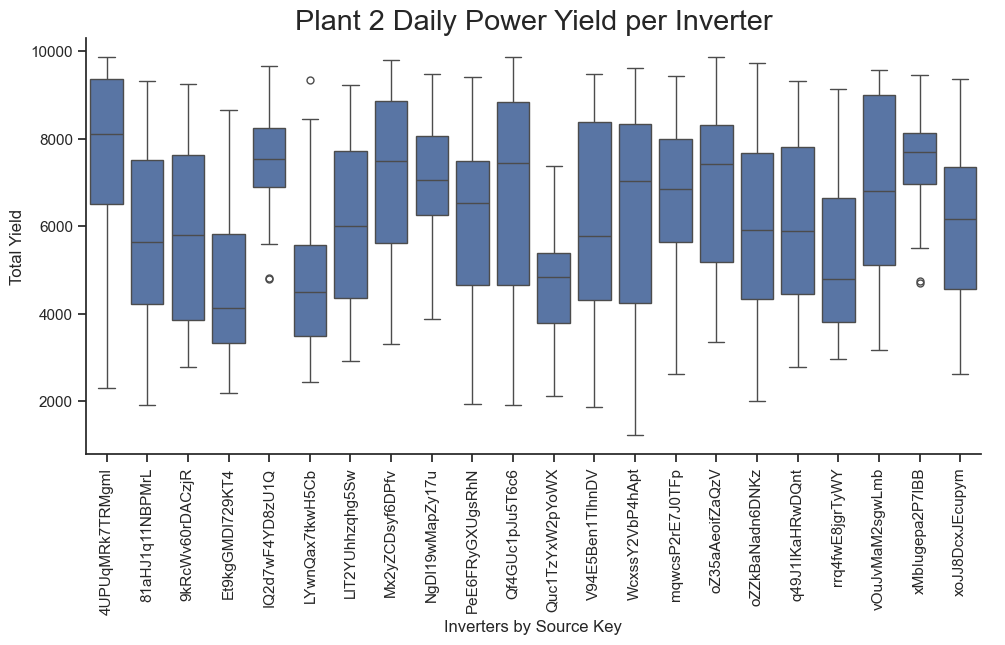

In [72]:
plt.figure(figsize=(10, 5))
sns.catplot(df_p2_inv_d_yield, x='SOURCE_KEY', y='DAILY_YIELD', kind='box', aspect=2)
plt.xticks(rotation=90)
plt.ylabel("Total Yield")
plt.xlabel('Inverters by Source Key')
plt.title('Plant 2 Daily Power Yield per Inverter', fontsize='xx-large')
plt.show()

<Figure size 1000x500 with 0 Axes>

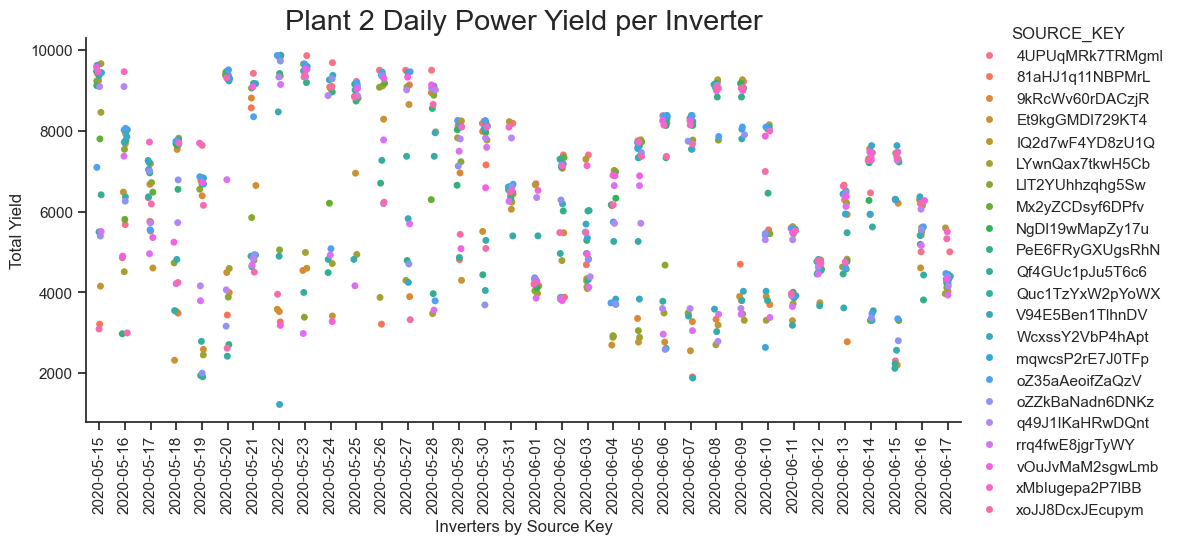

In [73]:
plt.figure(figsize=(10, 5))
sns.catplot(df_p2_inv_d_yield, x='DATE', y='DAILY_YIELD', hue='SOURCE_KEY', kind='strip', aspect=2)
plt.xticks(rotation=90)
plt.ylabel("Total Yield")
plt.xlabel('Inverters by Source Key')
plt.title('Plant 2 Daily Power Yield per Inverter', fontsize='xx-large')
plt.show()